<table style="width: 100%; border-style: none">
<tr style="border-style: none; background-color: #82a8cf">
<td style="border-style: none; width: 1%; text-align: left; font-size: 18px; color: #ffffff">Institut f&uuml;r Theoretische Physik<br /> <font color="#e6e6e6">Universit&auml;t zu K&ouml;ln </font></td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 18px; color: #ffffff">Prof. Dr. Simon Trebst<br /> <font color="#e6e6e6"> Christoph Berke </font> </td>
</tr>
</table>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h1 style="font-weight:200; text-align: center; margin: 0px; font-size: 48px; padding:0px; color: #606060">Computer-Physik </h1>
<h1 style="font-weight:light; text-align: center; margin: 10px; padding:0px; color: #606060"> Vorlesung &mdash; Programmiertechniken 9 </h1>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h3 style="font-weight:400; text-align: center; margin: 0px; font-size: 20px; padding:0px; margin-bottom: 20px; color: #606060">Sommersemester 2023</h3>
<!--<h3 style="font-weight:bold; text-align: center; margin: 0px; font-size: 15px; padding:0px; margin-bottom: 20px;">Website: <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></h3> -->

<font size="4" color="#606060">**Website:** <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></font>

<font size="4" color="#606060">**Themen dieses Notebooks**: <span style="color:#606060">  </span> 
  Implementation des Ising Modells in Julia, Diskussion der Thermodynamik des Ising Modells
<hr style="height:.3px">

# Das Ising-Modell

Das Ising Modell ist ein klassisches Spin-Modell welches sogenannte Ising Spins auf einem Quadratgitter beschreibt. Ising Spins können die Werte $\sigma_\alpha = \pm 1$ annehmen. Der komplette Hamiltonian des Modells ist

\begin{equation}
    \mathcal{H} = -J \sum_{\langle \alpha,\beta \rangle} \sigma_\alpha \sigma_\beta
\end{equation}

wobei die Summe über nächste Nachbarn auf dem Quadratgitter ausgeführt wird (siehe unten stehende Abbildung). $\alpha$ und $\beta$  bezeichnen dabei die Indices der verschiedenen Spins und können z.B. durch die Indices in den Gitterkoordinaten ausgedrückt werden: $\alpha = (i,j)$.

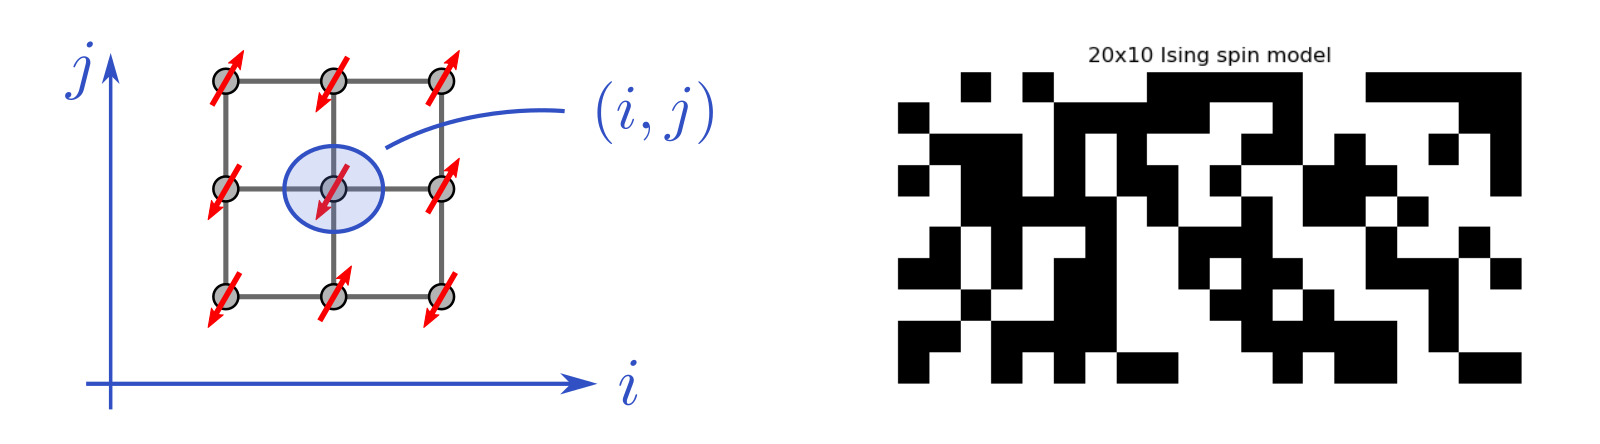

Die Implementierung soll nach folgendem Schema ablaufen:

1. Zuerst werden Funktionen implementiert, die Ising Spins erzeugen und plotten. Damit wird im Programm die Möglichkeit geschaffen, Konfigurationen von Spins zu erzeugen und zu untersuchen.
2. Auf die bestehenden Konfigurationen wird eine Energie nach oben stehendem Hamiltonian definiert. Dafür ist die Summe über Nachbarn eines Spins (i,j) essentiell. Hier wollen wir periodische Randbedingungen verwenden.
3. Mit Hilfe der Energie lässt sich das Metropolis-Update als Funktion darstellen. Damit ist es möglich Markov-Ketten zu generieren.
4. Als letzter Schritt folgt die Diskussion thermodynamischer Observablen.

# 1. Ising-Spins erzeugen und darstellen

### 1.1. Einen einzelnen Ising-Spin erzeugen

### 1.2. Ein Quadratgitter der Größe $L_x \times L_y$ mit Ising-Spins erzeugen

### 1.3. Ising-Spins darstellen

In [ ]:
using CairoMakie

### 1.4 Testen von Erzeugung und Plotten

# 2. Nachbarschaft und Energie einer Konfiguration

Man kann die Gesamtenergie aller Spins in eine Summe der Energien einzelner Spins umschreiben, indem

\begin{align*}
    \mathcal{H} &= -J \sum_{\langle \alpha,\beta \rangle} \sigma_\alpha \sigma_\beta \\
        &=  -\frac{J}{2} \sum_{\alpha} \sigma_\alpha \sum_{\beta \in NN(\alpha)} \sigma_\beta  \\
        &=  \sum_{\alpha} \mathcal{H}_\alpha
\end{align*}

sodass $\mathcal{H}_\alpha = -\frac{J}{2} \sigma_\alpha \sum_{\beta \in NN(\alpha)} \sigma_\beta$. Dabei taucht die Summe aller Nachbarn mit Indices $\beta$ eines Spins an Stelle $\alpha$ auf.

### 2.1. Summe aller Nachbarn um einen Spin $(i,j)$

#### Testen der Nachbarsummen

### 2.2. Energie aller Spins / Energie eines einzelnen Spins

#### Test der Energieberechnung

# 3. Metropolis Algorithmus

Hier benötigen wir zwei wesentliche Elemente:
1. das **Update** um von einer Konfiguration der Markov-Kette in eine Nächste überzugehen
2. die **Energiedifferenz** durch dieses Update

Wir wählen als Update das **Flippen eines einzelnen Spins $\sigma_\alpha$**. Damit ist die Energiedifferenz

\begin{align*}
    \Delta E &= \left(-J  \sum_{\langle \alpha,\beta \rangle} \sigma_\alpha' \sigma_\beta' \right) - \left(-J  \sum_{\langle \alpha,\beta \rangle} \sigma_\alpha \sigma_\beta\right) \\
        &= -J  \sum_{\beta \in NN(\alpha)} ((-\sigma_\alpha) \sigma_\beta - \sigma_\alpha \sigma_\beta) \\
        &= 2 J  \sum_{\beta \in NN(\alpha)} \sigma_\alpha \sigma_\beta \\
        &= 2 J \sigma_\alpha \sum_{\beta \in NN(\alpha)} \sigma_\beta
\end{align*}

welche wieder durch die Nachbarsummen ausgedrückt werden kann.

*Hinweis: Das Berechnen der **Gesamtenergie** ist für die Berechnung der Energiedifferenz nicht nötig!* 

### 3.1. Single Spin Flip update

### 3.2 Single Spin Flip sweep

# 4. Zusammenfügen und Test

# 5. Thermalisierung

Wie findet die Markov-Kette ihren Weg von einer anfänglichen Konfiguration zu einer Kette von Konfigurationen, die der Boltzmann-Verteilung folgen? 

## 5.1 Beispiel

In [ ]:
J = +1
T = 0.9

# Spins erzeugen
spins = get_Ising_spins(100, 70)
# Spins plotten
display(plot_Ising_spins(spins))
# Energie pro Spin ausgeben
println("Energie pro Spin: ", get_energy(spins,J) / length(spins))

# Viele Updates ausfuehren
# dabei wird die Spin Konfiguration veraendert
for i in 1:1000
    sweep_SSF!(spins, J, T)
end

# Resultierende Spin-Konfiguration anschauen
display(plot_Ising_spins(spins))
# Energie pro Spin ausgeben
println("Energie pro Spin: ", get_energy(spins,J) / length(spins))

## 5.2 Animation

In [ ]:
using GLMakie
GLMakie.activate!(inline = false)

function reset_spins!(spins, Lx, Ly)
    spins[] = get_Ising_spins(Lx, Ly)
    notify(spins) 
    return
end 
    
fig = Figure(resolution = (1200,1200))
ax = Axis(fig[2, 1:4], aspect = DataAspect())

# Temperatur über Slider definieren.
sl = Slider(fig[3, 1:2], range = 0:0.1:6, startvalue = 10) 

# Anzahl Spins in x- und y-Richtung.
Lx, Ly = 120, 120

# Spins erzeugen und darstellen.
spins = Observable(get_Ising_spins(Lx, Ly))
heatmap!(ax, spins, colormap=:grays, colorrange = (-1, 1))
hidedecorations!(ax)

# Kopplungsstaerke J definieren
J = 1

# Label, der den Wert des Temperatur-Slider anzeigt.
Label(fig[3, 3], map(v ->  "T = $v", sl.value), fontsize = 30)

# Label für die ganze Figure.
Label(fig[1, :], map(v -> "$Lx x $Ly Ising spin model @ T=$v (J=$(J))", sl.value), 
    tellwidth = false, fontsize = 40)

# Startbutton.
start = Button(fig[3, 4], label = "Start")

# Verknüpfe das Drücken des Buttons mit
# 1. Erstellung neuer Anfangskonfiguration
# 2. Starten der MC-Simulation.
on(start.clicks) do _
   
    reset_spins!(spins, Lx, Ly)
    @async while events(fig).window_open[]
        sweep_SSF!(spins[], J, sl.value[])
        sleep(0.1)
        notify(spins)
    end
        
end

display(fig)

## 5.3 Energie vs. Sweep

In [ ]:
# Kein extra Fenster aufmachen
CairoMakie.activate!()

fig = Figure()
ax = Axis(fig[1, 1])

L = 20
J = 1.0
T = 0.1
sweeps = 1000

for t in 1:100

    E_vals = zeros(sweeps)

    spins  = get_Ising_spins(L,L)

    for s in 1:sweeps
        sweep_SSF!(spins, J, T)
        E_vals[s] = get_energy(spins, J)/length(spins)
    end

    # plotte die Energie der Konfiguration gegen den aktuellen Sweep in der Markov-Kette
    lines!(ax, E_vals, color = (:blue, 0.1))
    
end


hlines!(ax, -2, color=:black, linestyle=:dash)
fig

# 6. Observable
## 6.1: Energie vs. T

Die Gesamtenergie des System lässt sich messen als:

\begin{equation}
    \langle E \rangle = \frac{1}{M} \sum_{i=1}^{M} \mathcal{H}(\Sigma_i)
\end{equation}

wobei $\Sigma_i$ die Spinkonfigurationen in der Markov-Kette sind.

In [ ]:
# Kopplungsstaerke J definieren
J = +1
# Temperatur T definieren
T_vals = range(0.1, 5.0, length=20)
# Anzahl der Sweeps für Thermalisierung und Messen
sweeps_TH = 10000
sweeps_ME = 1000


# Energieliste fuer Energiewerte
E_vals = Float64[]


# Alle Temperaturen T betrachten
for T in T_vals

    # Spins erzeugen
    spins = get_Ising_spins(10, 10)
    
    # Energie Mittelwert
    E_mean = 0

  # Thermalisierung
    for s in 1:sweeps_TH
        sweep_SSF!(spins, J, T)
    end
    # Messung
    for s in 1:sweeps_ME
        sweep_SSF!(spins, J, T)
        E_mean += get_energy(spins, J)
    end
    
    # Mittelwert berechnen
    E_mean = E_mean / (sweeps_ME)
    
    # mittelwert in liste pushen
    push!(E_vals, E_mean / length(spins))

end

# Energie gegen Temperatur plotten
lines(T_vals, E_vals, axis = (xlabel = "T", ylabel = "E/N"))

## 6.2: Magnetisierung vs. T

Die mittlere Magnetisierung des System lässt sich messen als:

\begin{equation}
    \langle M \rangle = \frac{1}{M} \sum_{i=1}^{M} M(\Sigma_i)
\end{equation}

wobei $\Sigma_i$ erneut die Spinkonfigurationen in der Markov-Kette sind und die Magnetisierung $M(\Sigma)$ definiert ist als Summe aller Spins der jeweiligen Konfiguration:

\begin{equation}
    M(\Sigma) = \sum_{\sigma_\alpha \in \Sigma} \sigma_\alpha
\end{equation}

In [ ]:
function get_magnetization(spin_array)
    return sum(spin_array)
end

In [ ]:
# Kopplungsstaerke J definieren
J = +1
# Systemgröße L definieren
L = 10
# Temperaturwerte T definieren
T_vals = range(0.1, 5.0, length=20)
# Anzahl der Sweeps für Thermalisierung und Messen
sweeps_TH = 10000
sweeps_ME = 1000

# Magnetisierungsliste fuer Magnetisierungswerte
M_vals = Float64[]


# Alle Temperaturen T betrachten
for T in T_vals

    # Spins erzeugen
    spins = get_Ising_spins(L, L)
    
    # Magnetisierungs Mittelwert initialisieren
    M_mean = 0.0

    # Thermalisierung
    for s in 1:sweeps_TH
        sweep_SSF!(spins, J, T)
    end
    # Messung
    for s in 1:sweeps_ME
        sweep_SSF!(spins, J, T)
        M_mean += abs(get_magnetization(spins))
    end
    
    # Mittelwert berechnen
    M_mean = M_mean / sweeps_ME
    
    # mittelwert in liste pushen
    push!(M_vals, M_mean / length(spins))

end


# Magnetisierung gegen Temperatur plotten
lines(T_vals, M_vals, axis = (xlabel = "T", ylabel="M/N"))

## 6.3 Spezifische Wärme

Die spezifische Wärmekapazität ist definiert als

\begin{equation}
    c_V = \frac{1}{N}\left.\frac{\partial \langle E \rangle}{\partial T}\right|_V
\end{equation}

Sie kann deswegen entweder als Ableitung der bereits berechneten Kurve E vs. T ermittelt werden, oder auf einem unabhängigen Weg über die Mittelwerte von $E$ und $E^2$ durch

\begin{equation}
    c_V = \frac{1}{T^2 N} \left(\langle E^2 \rangle - \langle E \rangle^2 \right)
\end{equation}

(Die Herleitung für diesen Ausdruck erfolgt über die Zustandssumme und wird Ihnen im Rahmen der statistischen Physik begegnen)

In [ ]:
# Kopplungsstaerke J definieren
J = +1
# Systemgröße L definieren
L = 20
# Temperaturwerte T definieren
T_vals = range(0.1, 5.0, length=20)
# Anzahl der Sweeps für Thermalisierung und Messen
sweeps_TH = 10000
sweeps_ME = 1000

# Liste fuer Spezifische Waerme
C_V_vals = Float64[]


# Alle Temperaturen T betrachten
for T in T_vals

    # Spins erzeugen
    spins = get_Ising_spins(L, L)
    
    # Energie Mittelwerte
    E_mean    = 0.0
    E_sq_mean = 0.0

    # Thermalisierung
    for s in 1:sweeps_TH
        sweep_SSF!(spins, J, T)
    end
    # Messung
    for s in 1:sweeps_ME
        sweep_SSF!(spins, J, T)
        energy  = get_energy(spins, J)
        E_mean    += energy
        E_sq_mean += energy*energy
    end
    
    # Mittelwerte berechnen
    E_mean    /= sweeps_ME
    E_sq_mean /= sweeps_ME
    
    # spez. waerme berechnen
    c_V = (E_sq_mean - E_mean*E_mean) / (T^2 * length(spins))
    
    # spez. waerme in liste pushen
    push!(C_V_vals, c_V)

end

# Energie gegen Temperatur plotten
lines(T_vals, C_V_vals, axis = (xlabel = "T", ylabel = "Cᵥ"))

# 7. Finite Size Scaling
### 7.1 Energie

In [ ]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel = "T", ylabel = "E")

# Kopplungsstaerke J definieren
J = +1
# Temperatur T definieren
T_vals = range(0.1, 5.0, length=20)

sweeps_TH = 10000
sweeps_ME = 10000

for L in [2,4,6,8,10]
    
    # Energieliste fuer Energiewerte
    E_vals = Float64[]

    # Alle Temperaturen T betrachten
    for T in T_vals

        # Spins erzeugen
        spins = get_Ising_spins(L, L)

        # Energie Mittelwert
        E_mean = 0

        # Thermalisieren
        for s in 1:sweeps_TH
            sweep_SSF!(spins, J, T)
        end
        # Messen
        for s in 1:sweeps_ME
            sweep_SSF!(spins, J, T)
            E_mean += get_energy(spins, J)
        end

        # mittelwert in liste pushen
        push!(E_vals, E_mean / (sweeps_ME*length(spins)))

    end


    # Energie gegen Temperatur plotten
    lines!(ax, T_vals, E_vals, label="L=$(L)")
    
end


axislegend(ax, position = (0, 1))
fig

## 7.2 Magnetisierung

In [ ]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel = "T", ylabel = "M")

# Kopplungsstaerke J definieren
J = +1
# Systemgröße L definieren
L_vals = [2,4,6,8,10]
# Temperaturwerte T definieren
T_vals = range(0.1, 5.0, length=20)
# Anzahl der Sweeps für Thermalisierung und Messen
sweeps_TH = 10000
sweeps_ME = 1000

# alle systemgrößen L betrachten
for L in L_vals

    # Magnetisierungsliste fuer Magnetisierungswerte
    M_vals = Float64[]

    # Alle Temperaturen T betrachten
    for T in T_vals

        # Spins erzeugen
        spins = get_Ising_spins(L, L)

        # Magnetisierungs Mittelwert initialisieren
        M_mean = 0.0

        # Thermalisierung
        for s in 1:sweeps_TH
            sweep_SSF!(spins, J, T)
        end
        # Messung
        for s in 1:sweeps_ME
            sweep_SSF!(spins, J, T)
            M_mean += abs(get_magnetization(spins))
        end

        # Mittelwert berechnen
        M_mean = M_mean / sweeps_ME

        # mittelwert in liste pushen
        push!(M_vals, M_mean/ length(spins))

    end
    
     # Magnetization gegen Temperatur plotten
    lines!(ax, T_vals, M_vals, label="L=$(L)")
    
end

axislegend(ax, position = (0.3, 0))
fig

## 7.3 Spezifische Wärme

In [ ]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel = "T", ylabel = "Cᵥ")

# Kopplungsstaerke J definieren
J = +1
# Systemgröße L definieren
L_vals = [2,4,6,8,10,12,20]
# Temperaturwerte T definieren
T_vals = range(0.1, 5.0, length=20)
# Anzahl der Sweeps für Thermalisierung und Messen
sweeps_TH = 10000
sweeps_ME = 10000




# alle systemgrößen L betrachten
for L in L_vals

    # Liste fuer Spezifische Waerme
    C_V_vals = Float64[]

    # Alle Temperaturen T betrachten
    for T in T_vals

        # Spins erzeugen
        spins = get_Ising_spins(L, L)

        # Energie Mittelwerte
        E_mean    = 0.0
        E_sq_mean = 0.0

        # Thermalisierung
        for s in 1:sweeps_TH
            sweep_SSF!(spins, J, T)
        end
        # Messung
        for s in 1:sweeps_ME
            sweep_SSF!(spins, J, T)
            energy  = get_energy(spins, J)
            E_mean    += energy
            E_sq_mean += energy*energy
        end

        # Mittelwerte berechnen
        E_mean    /= sweeps_ME
        E_sq_mean /= sweeps_ME

        # spez. waerme berechnen
        c_V = (E_sq_mean - E_mean*E_mean) / (T^2 * length(spins))

        # spez. waerme in liste pushen
        push!(C_V_vals, c_V)
    end

    # Spezifische Waerme gegen Temperatur plotten
    lines!(ax, T_vals, C_V_vals, label="L=$(L)")
    
end

axislegend(ax, position = (0, 1))
fig

# 8. Code beschleunigen

## 8.1. Neudefinition von Update und Sweep

In [ ]:
function update_SSF!(spin_array, J, T)
    # Update vorschlagen
    i = rand(1:size(spin_array)[1])
    j = rand(1:size(spin_array)[2])
    # dE ausrechnen
    dE = 2*J*spin_array[i,j]*get_NN_sum(spin_array, i,j)
    # Akzeptieren Ja / Nein
    if rand() < exp(-dE / T)
        # JA
        spin_array[i,j] *= -1
        # Aenderung der Energie zurueckgeben
        return dE
    else
        # NEIN
        # Aenderung der Energie zurueckgeben
        return 0.0
    end
end

function sweep_SSF!(spin_array, J, T)
    # Summiere Aenderung der Energie
    dE = 0.0
    # Anzahl spins an Update vorschlagen
    for u in 1:size(spin_array)[1]*size(spin_array)[2]
        dE += update_SSF!(spin_array, J, T)
    end
    # Aenderung der Energie zurueckgeben
    return dE
end

## 8.2 Testen

In [ ]:
GLMakie.activate!()

# Kopplungsstaerke J definieren
J = +1
# Temperatur T definieren
T = 0.1

# Spins erzeugen
spins = get_Ising_spins(100, 70)
energy = get_energy(spins, J)

# neue Figur zum Plotten
fig = Figure()
Label(fig[1, 1], "$(size(spins)[1])x$(size(spins)[2]) Ising spin model @ T=$(T) (J=$(J))", tellwidth = false)
ax = LScene(fig[2, 1], show_axis = false)
cam_relative!(ax)
p = image!(ax, 0..1, 0..1, spins, colormap=:grays, colorrange = (-1, 1), interpolate = false)
display(fig)

sleep(3)
# Sweeps durchfuehren und immer wieder updaten
for s in 1:1000
    energy += sweep_SSF!(spins, J, T)
    sweep_SSF!(spins, J, T)
    p[3][] = spins
    sleep(1/60)
end

# Ausgabe der Energie
println("Energie pro Spin (korrekt):    E=", get_energy(spins,J)/(length(spins)))
println("Energie pro Spin (mitgeführt): E=", energy/(length(spins)))

## 8.3 Finite Size Scaling der Spezifischen Wärme

In [ ]:
CairoMakie.activate!()
fig = Figure()
ax = Axis(fig[1, 1], xlabel = "T", ylabel = "E")

# Kopplungsstaerke J definieren
J = +1
# Systemgröße L definieren
L_vals = [4,12,24]
# Temperaturwerte T definieren
T_vals = range(0.4, 5.0, length=25)
# Anzahl der Sweeps für Thermalisierung und Messen
sweeps_TH = 10000
sweeps_ME = 10000



# alle systemgrößen L betrachten
for L in L_vals

    # Liste fuer Spezifische Waerme
    C_V_vals = Float64[]

    # Alle Temperaturen T betrachten
    for T in T_vals

        # Spins erzeugen
        spins  = get_Ising_spins(L, L)
        energy = get_energy(spins, J)

        # Energie Mittelwerte
        E_mean    = 0.0
        E_sq_mean = 0.0

        # Thermalisierung
        for s in 1:sweeps_TH
            energy += sweep_SSF!(spins, J, T)
        end
        # Messung
        for s in 1:sweeps_ME
            energy += sweep_SSF!(spins, J, T)
            E_mean    += energy
            E_sq_mean += energy*energy
        end

        # Mittelwerte berechnen
        E_mean    /= sweeps_ME
        E_sq_mean /= sweeps_ME

        # spez. waerme berechnen
        c_V = (E_sq_mean - E_mean*E_mean) / (T^2 * length(spins))

        # spez. waerme in liste pushen
        push!(C_V_vals, c_V)

    end

    # Spez. Waerme gegen Temperatur plotten
    lines!(ax, T_vals, C_V_vals, label="L=$(L)")
end

# Plot formattieren
axislegend(ax, position = (0, 1))
fig